# 합성곱 신경망(Convolution Neural Network)


<br>

<br>

## 합성곱 신경망
- 합성곱 신경망(Convolutional Neural Network)은 이미지 처리에 탁월한 성능을 보이는 신경망
- 합성곱 신경망은 크게 **합성곱층과(Convolution layer)** **풀링층(Pooling layer)으로 구성**
![convpooling[1].PNG](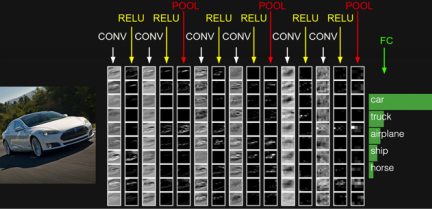)

- 위 그림에서 CONV는 합성곱 연산을 의미

  $→$ 합성곱 연산의 결과가 활성화 함수 ReLU를 지남

  $→$ 이 두 과정을 합성곱층

  $→$ 그 후 POOL이라는 구간 (풀링층) 통과

<br>

<br>

### 합성곱 신경망의 대두
- 합성곱 신경망은 이미지 처리에 탁월한 성능을 보이는 신경망
- 이미지 처리를 하기 위해서 앞서 배운 다층 퍼셉트론을 사용할 수는 있지만 한계 존재
  - 예) 알파벳 손글씨를 분류

    알파벳 Y를 비교적 정자로 쓴 손글씨와 다소 휘갈겨 쓴 손글씨 두 개를 2차원 텐서인 행렬로 표현한 것

    ![conv0[1].png](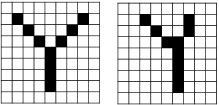)


- 사람이 보기에는 두 그림 모두 알파벳 Y로 손쉽게 판단이 가능하지만, 기계가 보기에는 각 픽셀마다 가진 값이 대부분 상이하므로 사실상 다른 값을 가진 입력
- 그런데 이미지라는 것은 위와 같이 같은 대상이라도 휘어지거나, 이동되었거나, 방향이 뒤틀렸거나 등 다양한 변형이 존재
- **다층 퍼셉트론은 몇 가지 픽셀만 값이 달라져도 민감하게 예측에 영향을 받는다는 단점 존재**

<br>

- 위 손글씨를 다층 퍼셉트론으로 분류한다고 하면, **이미지를 1차원 텐서인 벡터로 변환하고 다층 퍼셉트론의 입력층으로 사용**
  - 두번째 손글씨를 다층 퍼셉트론으로 분류하기 위해서 벡터로 변환

  ![conv1[1].png](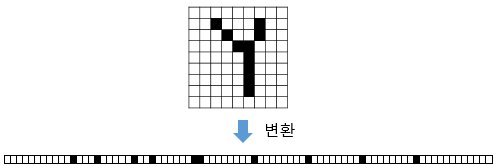)

- 1차원으로 변환된 결과는 사람이 보기에도 이게 원래 어떤 이미지였는지 알아보기가 어려우며, 이는 기계도 마찬가지
- **위와 같이 결과는 변환 전에 가지고 있던 공간적인 구조(spatial structure) 정보가 유실된 상태**
  - **공간적인 구조 정보 : 거리가 가까운 어떤 픽셀들끼리는 어떤 연관이 있고, 어떤 픽셀들끼리는 값이 비슷하거나 등을 정보를 포함**

<br>

**결국 이미지의 공간적인 구조 정보를 보존하면서 학습할 수 있는 방법이 필요해졌고, 이를 위해 합성곱 신경망을 사용**

<br>

### 채널(Channel)
- 기계는 글자나 이미지보다 숫자. 다시 말해, 텐서를 더 잘 처리
  - **이미지는 (높이, 너비, 채널)이라는 3차원 텐서**
  - **높이** : 이미지의 세로 방향 픽셀 수
  - **너비** : 이미지의 가로 방향 픽셀 수
  - **채널** : 색 성분
    - **흑백 이미지는 채널 수가 1이며, 각 픽셀은 0부터 255 사이의 값**

  ![conv2[1].png](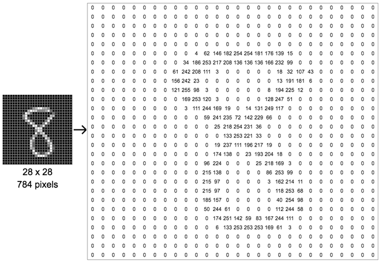)

- 위 데이터는 흑백 이미지므로, **채널 수가 1임을 고려하면 (28 × 28 × 1)의 크기를 가지는 3차원 텐서**

<br>

- **컬러 이미지는 적색(Red), 녹색(Green), 청색(Blue) 채널 수가 3개**
- 하나의 픽셀은 세 가지 색깔, 삼원색의 조합으로 구성
  - **높이가 28, 너비가 28인 컬러 이미지가 있다면, 이 이미지의 텐서는 (28 × 28 × 3)의 크기를 가지는 3차원 텐서**
    - 채널은 때로는 깊이(depth)

  ![conv3[1].png](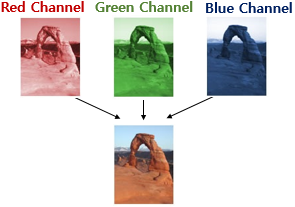)


<br>

### 합성곱 연산(Convolution operation)
- 합성곱층은 합성곱 연산을 통해서 이미지의 특징을 추출하는 역할
- **합성곱은 커널(kernel) 또는 필터(filter) 라는 $n \times m$ 크기의 행렬로 높이($height$) $\times$ 너비$width$ 크기의 이미지를**

  **처음부터 끝까지 겹치며 훑으면서 $n\times m$크기의 겹쳐지는 부분의 각 이미지와 커널의 원소의 값을 곱해서 모두 더한 값을 출력**
  - **이때, 이미지의 가장 왼쪽 위부터 가장 오른쪽 아래까지 순차적으로 스캔**
  - **커널(kernel)은 일반적으로 3 × 3 또는 5 × 5를 사용**

<br>

**1. 첫 번째 스텝**

![conv4[1].png](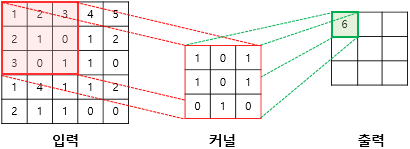)

$(1×1) + (2×0) + (3×1) + (2×1) + (1×0) + (0×1) + (3×0) + (0×1) + (1×0) = 6$

<br>

**2. 두 번쨰 스텝**

![conv5[1].png](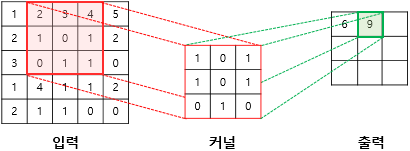)
$(2×1) + (3×0) + (4×1) + (1×1) + (0×0) + (1×1) + (0×0) + (1×1) + (1×0) = 9$

<br>

**3. 세 번째 스텝**

![conv6[1].png](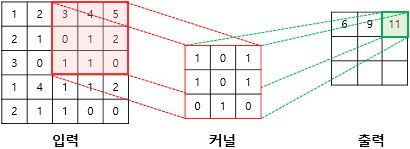)

$(3×1) + (4×0) + (5×1) + (0×1) + (1×0) + (2×1) + (1×0) + (1×1) + (0×0) = 11$

<br>

**네 번째 스텝**

![conv7[1].png](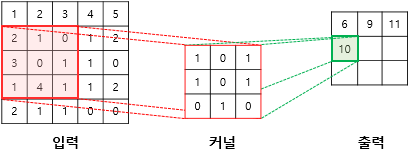)

$(2×1) + (1×0) + (0×1) + (3×1) + (0×0) + (1×1) + (1×0) + (4×1) + (1×0) = 10$

<br>

**위 연산을 총 9번의 스텝까지 마쳤다고 가정하였을 때, 최종 결과**

![conv8[1].png](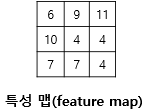)


<br>

#### 특성 맵(feature map) : 입력으로부터 커널을 사용하여 합성곱 연산을 통해 나온 결과
#### 스트라이드(stride) : 커널의 이동 범위

- **아래의 예제는 스트라이드가 2일 경우에 5 × 5 이미지에 합성곱 연산을 수행하는 3 × 3 커널의 움직임**

  **$→$ 최종적으로 2 × 2의 크기의 특성 맵**

![conv9[1].png](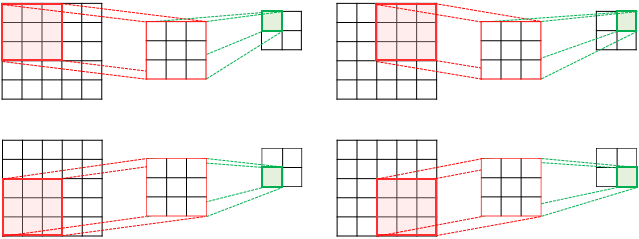)

<br>

### 패딩(Padding)

- **합성곱 연산의 결과로 얻은 특성 맵은 입력보다 크기가 작아진다는 특징**
  - - 5 × 5 이미지에 3 × 3의 커널로 합성곱 연산을 하였을 때, 스트라이드가 1일 경우에는 3 × 3의 특성 맵
  - **합성곱 층을 여러개 쌓았다면 최종적으로 얻은 특성 맵은 초기 입력보다 매우 작아진 상태**
- **합성곱 연산 이후에도 특성 맵의 크기가 입력의 크기와 동일하게 유지되도록 하고 싶다면 패딩(padding)을 사용**

![conv10[1].png](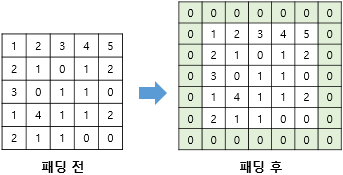)

- **패딩은 (합성곱 연산을 하기 전에) 입력의 가장자리에 지정된 개수의 폭만큼 행과 열을 추가해주는 것**
  - **주로 값을 0으로 채우는 제로 패딩(zero padding)을 사용**
  - **만약 스트라이드가 1이라고 하였을 때, 3 × 3 크기의 커널을 사용한다면 → 1폭짜리 제로 패딩을 사용**

  - **5 × 5 크기의 커널을 사용한다면, 2폭 짜리 제로 패딩을 사용하여 입력과 특성 맵의 크기를 보존**

  - 5 × 5 크기의 이미지에 1폭짜리 제로 패딩을 하면 7 × 7 이미지

    → 3 × 3의 커널을 사용하여 1 스트라이드로 합성곱을 한 후의 특성 맵은 기존의 입력 이미지의 크기와 같은 5 × 5

<br>

### 가중치와 편향

<br>

#### 합성곱 신경망의 가중치
- 이미지를 1차원 텐서인 벡터로 만들면, 3 × 3 = 9가 되므로 입력층은 9개의 뉴런을
- 그리고 4개의 뉴런을 가지는 은닉층을 추가한다면,

  ![conv11[1].png](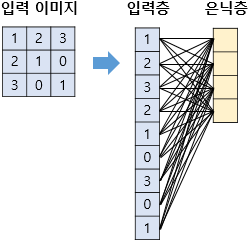)

- 위에서 각 연결선은 가중치를 의미하므로, 위의 그림에서는 9 × 4 = 36개의 가중치

<br>

- 3 × 3 이미지를 처리, 2 × 2 커널을 사용하고, 스트라이드는 1일 때. (*는 합성곱 연산을 의미)

  ![conv12[1].png](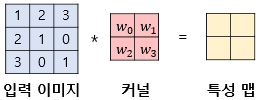)

- **합성곱 신경망에서 가중치는 커널 행렬의 원소들**
  - 이를 인공 신경망의 형태로 표현

  ![conv13[1].png](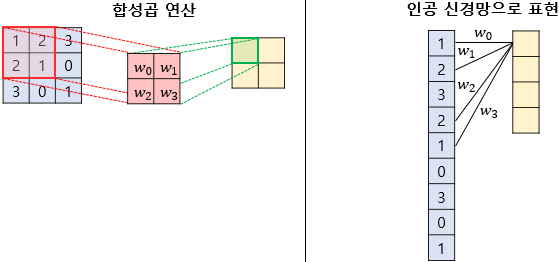)

- **최종적으로 특성 맵을 얻기 위해서는 동일한 커널로 이미지 전체를 훑으며 합성곱 연산을 진행**
  - 이미지 전체를 훑으면서 사용되는 가중치는 $w_1$, $w_2$, $w_3$, $w_4$ 4개
- **그리고 각 합성곱 연산마다 이미지의 모든 픽셀을 사용하는 것이 아니라, 커널과 맵핑되는 픽셀만을 입력으로 사용하는 것**

<br>

**결국 합성곱 신경망은 다층 퍼셉트론을 사용할 때보다 훨씬 적은 수의 가중치를 사용하며 공간적 구조 정보를 보존한다는 특징**

<br>

- 다층 퍼셉트론의 은닉층에서는 가중치 연산 후에 비선형성을 추가하기 위해서 활성화 함수를 통과 $→$ 합성곱 신경망의 은닉층에서도 동일
- **합성곱 연산을 통해 얻은 특성 맵은 다층 퍼셉트론때와 마찬가지로 비선형성 추가를 위해서 활성화 함수를 통과**
  - ReLU 함수나 ReLU 함수의 변형들이 주로 사용

<br>

**합성곱 연산을 통해서 특성 맵을 얻고, 활성화 함수를 지나는 연산을 하는 합성곱 신경망의 층을**

  **합성곱 신경망에서는 합성곱 층(convolution layer)**

<br>

### 특성 맵의 크기 계산 방법
- **$I_h$** : 입력의 높이
- **$I_w$** : 입력의 너비
- **$K_h$** : 커널의 높이
- **$K_w$** : 커널의 너비
- **$S$** : 스트라이드
- **$O_h$** : 특성 맵의 높이
- **$O_w$** : 특성 맵의 너비
- **$P$** : 패딩의 폭

$$O_{h} = floor(\frac{I_{h} - K_{h} + 2P}{S}+1)$$

$$O_{w} = floor(\frac{I_{w} - K_{w} + 2P}{S}+1)$$

<br>

### 다수의 채널을 가질 경우의 합성곱 연산(3차원 텐서의 합성곱 연산)
- 실제로 합성곱 연산의 입력은 '다수의 채널을 가진' 이미지 또는 이전 연산의 결과로 나온 특성 맵
- **만약, 다수의 채널을 가진 입력 데이터를 가지고 합성곱 연산을 한다고 하면 커널의 채널 수도 입력의 채널 수만큼 존재**
- **입력 데이터의 채널 수와 커널의 채널 수는 같아야 함**
- **채널 수가 같으므로, 합성곱 연산을 채널마다 수행**

  **그리고 그 결과를 모두 더하여 최종 특성 맵을 계산**

  ![conv15[1].png](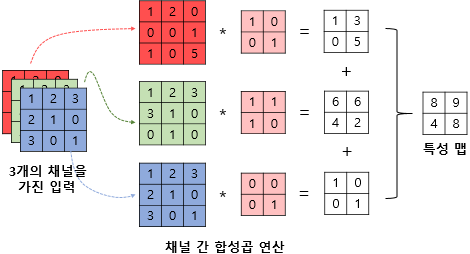)



- 위 그림은 3개의 채널을 가진 입력 데이터와 3개의 채널을 가진 커널의 합성곱 연산
- **커널의 각 채널끼리의 크기는 같아야 함**
- **각 채널 간 합성곱 연산을 마치고, 그 결과를 모두 더해서 하나의 채널을 가지는 특성 맵을 생성**
- **위의 연산에서 사용되는 커널은 3개의 커널이 아니라 3개의 채널을 가진 1개의 커널**

<br>

### 3차원 텐서의 합성곱 연산
- **$I_h$** : 입력의 높이
- **$I_w$** : 입력의 너비
- **$K_h$** : 커널의 높이
- **$K_w$** : 커널의 너비
- **$O_h$** : 특성 맵의 높이
- **$O_w$** : 특성 맵의 너비
- **$C_t$** : 입력 데이터의 채널

  ![conv16_final[1].png](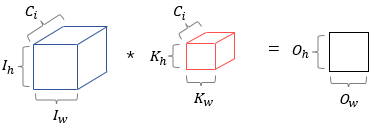)

- **높이 $I_h$, 너비 $I_w$, 채널 $C_t$의 입력 데이터는**

  **동일한 채널 수 $C_t$를 가지는 높이 $K_h$, 너비 $K_w$의 커널과 합성곱 연산을 하여**

  **높이 $O_h$, 너비 $O_w$, 채널 1의 특성 맵을 얻음**

<br>

- **합성곱 연산에서 다수의 커널을 사용할 경우, $C_o$를 합성곱 연산에 사용하는 커널의 수라고 하였을 때**
  - **사용한 커널 수는 합성곱 연산의 결과로 나오는 특성 맵의 채널 수**

  ![conv17_final_final[1].PNG](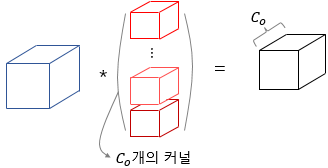)



- **커널의 크기와 입력 데이터의 채널 수 $C_t$
와 특성 맵(출력 데이터)의 채널 수 $C_o$가 주어졌을 때, 가중치는 커널의 원소들이므로 하나의 커널의 하나의 채널은 $K_i$ × $K_o$개의 매개변수를 가지고 있음**
- **합성곱 연산을 하려면 커널은 입력 데이터의 채널 수와 동일한 채널 수를 가져야 함**

  **$→$ 이에 따라 하나의 커널이 가지는 매개변수의 수는 $K_i$ × $K_o$ × $C_t$**
- **그런데 이러한 커널이 총 $C_o$개가 있어야 하므로 가중치 매개변수의 총 수는**

$$K_i \times K_{o} \times C_i \times C_o$$

<br>

### 풀링(Pooling)
- 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적
- **풀링 층에서는 특성 맵을 다운샘플링하여 특성 맵의 크기를 줄이는 풀링 연산이 진행**
  - **풀링 연산에는 일반적으로 최대 풀링(max pooling)과 평균 풀링(average pooling)이 사용**

  ![maxpooling[1].PNG](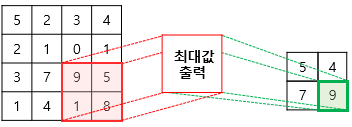)


- 풀링 연산에서도 합성곱 연산과 마찬가지로 커널과 스트라이드의 개념 적용
- 위의 그림은 스트라이드가 2일 때, 2 × 2 크기 커널로 맥스 풀링 연산을 했을 때 특성맵이 절반의 크기로 다운샘플링
  - **Max Pooling : 커널과 겹치는 영역 안에서 최대값을 추출**
  - **Average Pooling : 평균값을 추출**
- **풀링 연산은 커널과 스트라이드 개념이 존재한다는 점에서 합성곱 연산과 유사하지만, 합성곱 연산과의 차이점은 학습해야 할 가중치가 없으며 연산 후에 채널 수가 변하지 않음**

<br>

<br>

## 1D CNN(1D Convolutional Neural Networks)

<br>

### 2D 합성곱(2D Convolutions)
```
합성곱 연산이란 커널(kernel) 또는 필터(filter) 라는 n × m 크기의 행렬로 높이(height) × 너비(width) 크기의 이미지를
처음부터 끝까지 겹치며 훑으면서 n × m 크기의 겹쳐지는 부분의 각 이미지와 커널의 원소의 값을 곱해서 모두 더한 값을 출력으로 하는 것을 말합니다.
이때, 이미지의 가장 왼쪽 위부터 가장 오른쪽 아래까지 순차적으로 훑습니다.
```

<br>

### 1D 합성곱(1D Convolutions)
- **1D 합성곱 연산에서 입력이 되는 것은 각 단어가 벡터로 변환된 문장 행렬**로, LSTM과 입력을 받는 형태는 동일

<br>

* 'wait for the video and don't rent it'이라는 문장이 있을 때,

  이 문장이 토큰화, 패딩, 임베딩 층(Embedding layer)을 거친다면 다음과 같은 문장 형태의 행렬로 변환

  ($n$은 문장의 길이, $k$는 임베딩 벡터의 차원)

  ![sentence_matrix[1].PNG](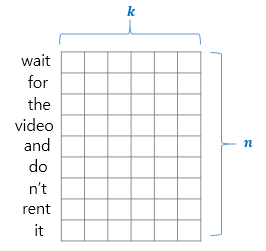)

- 위 행렬이 만약 LSTM의 입력으로 주어진다면,

  LSTM은 첫번째 시점에는 첫번째 행을 입력으로

  두번째 시점에는 두번째 행을 입력으로 받으며 순차적으로 단어를 처리


<br>

- **1D 합성곱 연산에서 커널의 너비는 문장 행렬에서의 임베딩 벡터의 차원과 동일하게 설정**
  - **커널이 2D 합성곱 연산때와는 달리 너비 방향으로는 더 이상 움직일 곳이 없다는 것을 의미**

    → **1D 합성곱 연산에서는 커널이 문장 행렬의 높이 방향으로만 움직임**

- **1D 합성곱 연산에서는 커널의 높이만으로 해당 커널의 크기라고 간주**
  - 가령, 커널의 크기가 2인 경우에는 아래의 그림과 같이 높이가 2, 너비가 임베딩 벡터의 차원인 커널이 사용



  ![1d_cnn[1].PNG](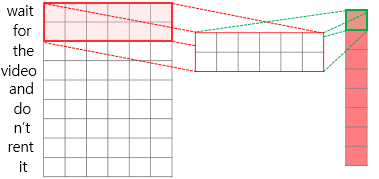)

<br>

- 한 번의 연산을 1 스텝(step)이라고 하였을 때, 합성곱 연산의 네번째 스텝까지 표현한 이미지
  - 처음에는 'wait for'에 대해서 합성곱 연산
  - 두번째 스텝에는 'for the'에 대해서 연산
  - 세번째 스텝에는 'the video'에 대해서 연산
  - 네번째 스텝에서는 'video and'에 대해서 연산

![네번째스텝[1].PNG](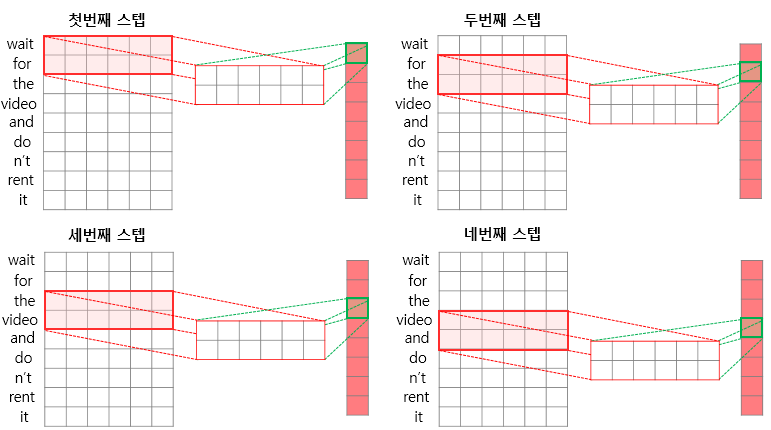)

<br>

- 1D 합성곱 연산에서도 커널의 크기는 사용자가 변경 가능
  - 커널의 크기를 3으로 할 때

    ![커널3[1].PNG](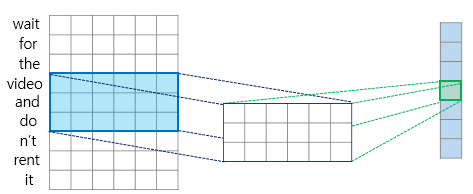)


<br>

- **CNN에서의 커널은 신경망 관점에서는 가중치 행렬이므로, 커널의 크기에 따라 학습하게 되는 파라미터의 수는 달라짐**
- 1**D 합성곱 연산과 자연어 처리 관점에서는 커널의 크기에 따라서 참고하는 단어의 묶음의 크기가 달라짐**
  - **이는 참고하는 n-gram이 달라지는 것**
    - **커널의 크기가 2라면 각 연산의 스텝에서 참고하는 것은 bigram**
    - **커널의 크기가 3이라면 각 연산의 스텝에서 참고하는 것은 trigram**

<br>

### 맥스 풀링(Max-pooling)

- 1D CNN에서도 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가
- **그 중 대표적으로 사용되는 것이 맥스 풀링(Max-pooling)**
  - 맥스 풀링은 각 합성곱 연산으로부터 얻은 결과 벡터에서 가장 큰 값을 가진 스칼라 값을 빼내는 연산

![맥스풀링[1].PNG](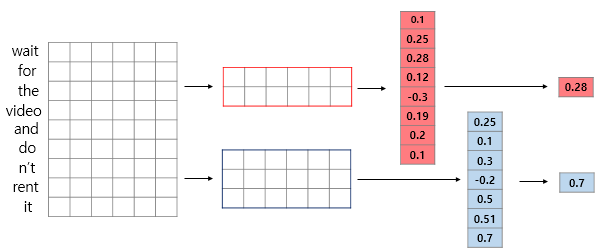)

<br>

### 신경망 설계
- 시그모이드 함수를 사용할 것이므로 출력층에서 뉴런의 개수가 2인 신경망을 설계
- 커널은 크기가 4인 커널 2개, 3인 커널 2개, 2인 커널 2개를 사용

![conv1d[1].PNG](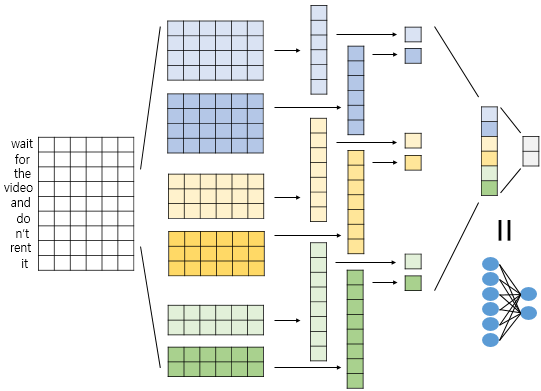)



- **문장의 길이가 9인 경우, 합성곱 연산을 한 후에는 각각 6차원 벡터 2개, 7차원 벡터 2개, 8차원 벡터 2개를 얻음**
- **벡터가 6개므로 맥스 풀링을 한 후에는 6개의 스칼라 값을 얻는데, **

  **일반적으로 이렇게 얻은 스칼라값들은 전부 연결(concatenate)하여 하나의 벡터로**

- **이렇게 얻은 벡터는 1D CNN을 통해서 문장으로부터 얻은 벡터**
- **이를 뉴런이 2개인 출력층에 완전 연결시키므로서(Dense layer를 사용) 텍스트 분류를 수행**

<br>

### 케라스(Keras) CNN 구현

<br>

#### `tensorflow.keras.layers.Conv1D(num_filters, kernel_size, padding, activation)`
- **`num_filters`** = 커널의 개수
- **`kernel_size`** = 커널의 크기
- **`padding`** = 패딩 방법
  - **`valid`** : 패딩 없음. 제로 패딩없이 유효한(valid) 값만을 사용한다는 의미에서 valid
  - **`same`** : 합성곱 연산 후에 출력이 입력과 동일한 차원을 가지도록 왼쪽과 오른쪽(또는 위, 아래)에 제로 패딩을 추가

- **`activation`** = 활성화 함수

<br>

### CNN모델 IMDB 리뷰 분류

In [1]:
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences

#### 데이터 로드

In [2]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=vocab_size)

17464789/17464789 [==============================] - 0s 0us/step


#### 패딩

In [4]:
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print('X_train의 크기(shape) :',X_train.shape)
print('X_test의 크기(shape) :',X_test.shape)

X_train의 크기(shape) : (25000, 200)
X_test의 크기(shape) : (25000, 200)


<br>

#### 1D CNN으로 IMDB 리뷰 분류

In [17]:
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model, Sequential

import matplotlib.pyplot as plt

- 임베딩 벡터의 차원 : 256
- 드롭 아웃 비율은 0.3
- 커널의 크 : 3 / 커널은 총 256개
- 은닉층의 뉴런 수 : 128
- 출력층 활성화 함수 : 시그모이드 함수 / 손실 함수 : 크로스 엔트로피 함수
- 20 에포크를 수행

In [6]:
embedding_dim = 256 # 임베딩 벡터의 차원
dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 256 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수

In [11]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 256)         2560000   
                                                                 
 dropout_4 (Dropout)         (None, None, 256)         0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 256)         196864    
                                                                 
 global_max_pooling1d_2 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

In [12]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=False, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=False, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [14]:
history = model.fit(X_train, y_train,
                    epochs=20, validation_data=(X_test, y_test),
                    callbacks=[es, mc], verbose=False)

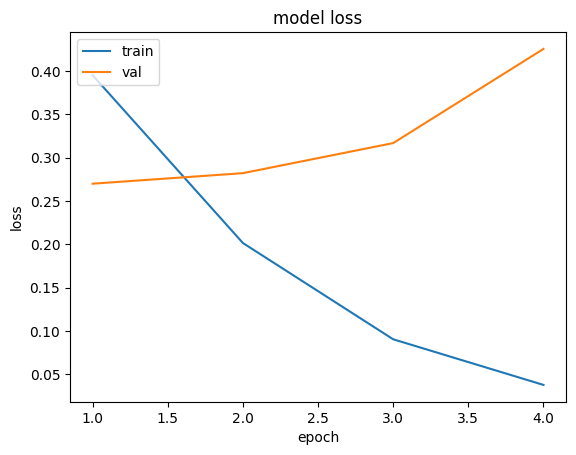

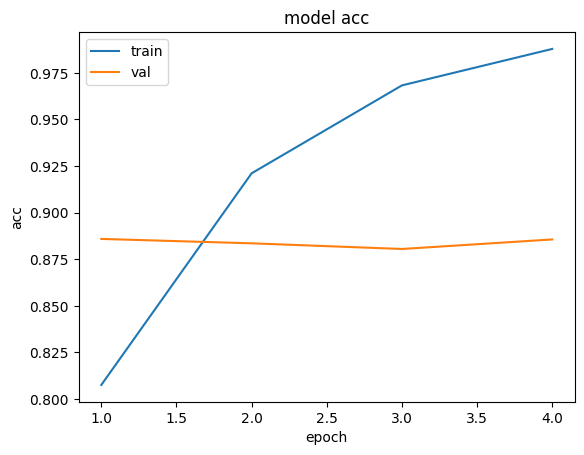

In [18]:
epochs = range(1, len(history.history['acc']) + 1)

plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<br>

#### 모델 평가

In [15]:
loaded_model = load_model('best_model.h5')

print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 3s 3ms/step - loss: 0.2700 - acc: 0.8859

 테스트 정확도: 0.8859
